In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('thietbi.csv',header=0,delimiter=',',encoding='utf-8')
df

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [9]:
df1 = pd.read_csv('nguoidung_sudung.csv',header=0,delimiter=',',encoding='utf-8')
df1

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [10]:
df2 = pd.read_csv('nguoidung_thietbi.csv',header=0,delimiter=',',encoding='utf-8')
df2

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [11]:
#1
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [12]:
#2
from graphviz import Digraph
# Khởi tạo đối tượng Digraph
dot = Digraph(comment='ERD for Device, User and Usage')

# Thực thể Device
dot.node('Device', 'Device\nModel (PK)\nBranding\nMarketingName\nDevice')

# Thực thể User
dot.node('User', 'User\nUser_ID (PK)\nPlatform\nPlatform_Version\nDevice')

# Thực thể Usage
dot.node('Usage', 'Usage\nUse_ID (PK)\nOutgoing_Mins_Per_Month\nOutgoing_SMS_Per_Month\nMonthly_MB')

# Mối quan hệ giữa Device và User (Many-to-Many)
dot.edge('Device', 'User', label='Used_By')

# Mối quan hệ giữa User và Usage (One-to-Many)
dot.edge('User', 'Usage', label='Has')

# Hiển thị và lưu sơ đồ
dot.render('erd', format='png', view=True)


'erd.png'

In [13]:
#3
thietbi.rename(columns={'Retail Branding':'Branding','Marketing Name':'MarketingName'}, inplace=True)

In [14]:
#4
dfKetQua = pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [15]:
#5
# inner-join
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model')

In [16]:
#6
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [17]:
#7
dfKetQua.groupby('Branding').agg({
'outgoing_mins_per_month':'mean',
'outgoing_sms_per_month':'mean',
'monthly_mb':'mean',
'use_id':'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

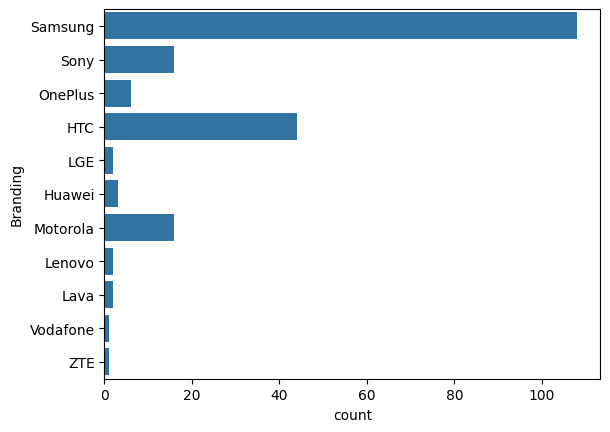

In [19]:
#8
sns.countplot(y='Branding', data=dfKetQua)
plt.show()

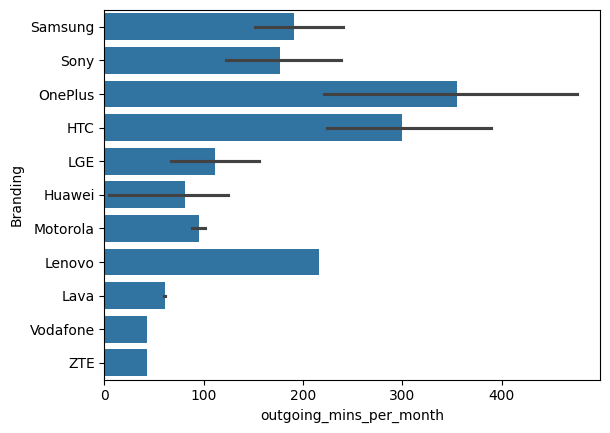

In [20]:
#9
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua)
plt.show()

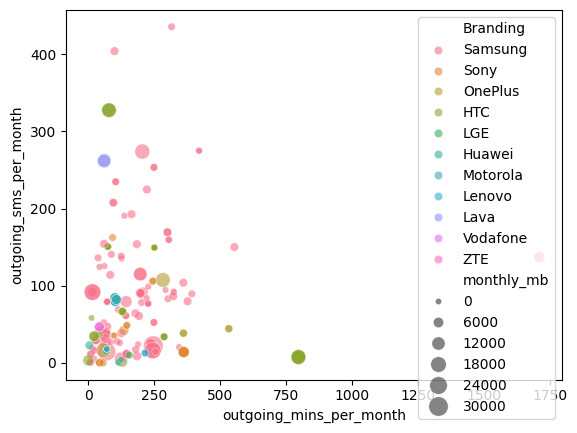

In [21]:
#10
sns.scatterplot(data=dfKetQua, x='outgoing_mins_per_month', y='outgoing_sms_per_month', 
                hue='Branding', size='monthly_mb', sizes=(20, 200), 
                alpha=0.6, legend='brief')

plt.show()

In [22]:
#11
import pandas as pd
from scipy import stats

# Lấy cột outgoing_mins_per_month
outgoing_mins = dfKetQua['outgoing_mins_per_month']

# Thực hiện kiểm định t một mẫu với giả thuyết trung bình bằng 200
t_statistic, p_value = stats.ttest_1samp(outgoing_mins, 200)

# Hiển thị kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 200 phút.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 200 phút.")

T-statistic: 0.3678324474067915
P-value: 0.7133871524810331
Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 200 phút.


In [23]:
#12
# Lấy cột outgoing_sms_per_month
outgoing_sms = dfKetQua['outgoing_sms_per_month']

# Thực hiện kiểm định t một mẫu với giả thuyết trung bình bằng 100
t_statistic, p_value = stats.ttest_1samp(outgoing_sms, 100)

# Hiển thị kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 100 tin nhắn.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 100 tin nhắn.")

T-statistic: -2.956708578196125
P-value: 0.0034834938502051878
Bác bỏ giả thuyết H0: Trung bình không bằng 100 tin nhắn.


In [24]:
#13
# Lấy cột monthly_mb
monthly_mb = dfKetQua['monthly_mb']

# Thực hiện kiểm định t một mẫu với giả thuyết trung bình bằng 2048 MB
t_statistic, p_value = stats.ttest_1samp(monthly_mb, 2048)

# Hiển thị kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 2048 MB.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 2048 MB.")

T-statistic: 5.918078326415772
P-value: 1.3950238813156428e-08
Bác bỏ giả thuyết H0: Trung bình không bằng 2048 MB.


In [25]:
#14
# Lọc các cột cần thiết
df_subset = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']]

# Tạo ma trận tương quan
correlation_matrix = df_subset.corr()

# Hiển thị ma trận tương quan
print("Ma trận tương quan:")
print(correlation_matrix)

# Chuyển đổi ma trận thành định dạng có thể sắp xếp
correlation_pairs = correlation_matrix.unstack()

# Sắp xếp mức độ tương quan tăng dần
sorted_correlation = correlation_pairs.sort_values()

# Hiển thị kết quả
print("\nMức độ tương quan (tăng dần):")
print(sorted_correlation)

Ma trận tương quan:
                         outgoing_mins_per_month  outgoing_sms_per_month  \
outgoing_mins_per_month                 1.000000               -0.016494   
outgoing_sms_per_month                 -0.016494                1.000000   
monthly_mb                              0.213489               -0.046049   

                         monthly_mb  
outgoing_mins_per_month    0.213489  
outgoing_sms_per_month    -0.046049  
monthly_mb                 1.000000  

Mức độ tương quan (tăng dần):
outgoing_sms_per_month   monthly_mb                -0.046049
monthly_mb               outgoing_sms_per_month    -0.046049
outgoing_mins_per_month  outgoing_sms_per_month    -0.016494
outgoing_sms_per_month   outgoing_mins_per_month   -0.016494
outgoing_mins_per_month  monthly_mb                 0.213489
monthly_mb               outgoing_mins_per_month    0.213489
outgoing_mins_per_month  outgoing_mins_per_month    1.000000
outgoing_sms_per_month   outgoing_sms_per_month     1.000000
mont

In [26]:
#15
# Lấy các cột cần kiểm định
outgoing_mins = dfKetQua['outgoing_mins_per_month']
outgoing_sms = dfKetQua['outgoing_sms_per_month']

# Thực hiện kiểm định tương quan Pearson
correlation_coefficient, p_value = stats.pearsonr(outgoing_mins, outgoing_sms)

# Hiển thị kết quả
print(f"Hệ số tương quan Pearson: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Có bằng chứng thống kê rằng hai biến có tương quan.")
else:
    print("Không đủ bằng chứng thống kê để kết luận hai biến có tương quan.")

Hệ số tương quan Pearson: -0.016494441685319394
P-value: 0.8162223636414793
Không đủ bằng chứng thống kê để kết luận hai biến có tương quan.


In [27]:
#16
from scipy.stats import chi2_contingency

# Tạo bảng tần suất
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])
print("Bảng tần suất:")
print(contingency_table)

# Thực hiện kiểm định Chi-squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Hiển thị kết quả
print(f"\nChi-squared: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table:\n{expected}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p < alpha:
    print("Có bằng chứng thống kê cho thấy có mối quan hệ giữa platform và Branding.")
else:
    print("Không đủ bằng chứng thống kê để kết luận có mối quan hệ giữa platform và Branding.")


Bảng tần suất:
Branding  HTC  Huawei  LGE  Lava  Lenovo  Motorola  OnePlus  Samsung  Sony  \
platform                                                                     
android    44       3    2     2       2        16        6      108    16   

Branding  Vodafone  ZTE  
platform                 
android          1    1  

Chi-squared: 0.0000
P-value: 1.0000
Degrees of freedom: 0
Expected frequencies table:
[[ 44.   3.   2.   2.   2.  16.   6. 108.  16.   1.   1.]]
Không đủ bằng chứng thống kê để kết luận có mối quan hệ giữa platform và Branding.


In [28]:
#17
# Tạo bảng tần số chéo giữa platform và branding
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['monthly_mb'])
print("Bảng tần suất:")
print(contingency_table)


# Thực hiện kiểm định Chi-squared
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Hiển thị kết quả
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Có mối quan hệ giữa platform và  monthly_mb.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Không có mối quan hệ giữa platform và  monthly_mb.")

Bảng tần suất:
monthly_mb  0.00      11.68     33.79     74.40     212.64    407.01    \
platform                                                                 
android            1         1         2         1         4         1   

monthly_mb  519.12    803.24    894.58    1038.21   ...  9005.49   9344.00   \
platform                                            ...                       
android           30         1         2         8  ...         1         1   

monthly_mb  10158.50  10382.21  12458.67  15573.33  16611.55  20764.45  \
platform                                                                 
android            1         1         4        13         1         4   

monthly_mb  25955.55  31146.67  
platform                        
android            1         1  

[1 rows x 31 columns]
Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Không đủ bằng chứng bác bỏ giả thuyết H0: Không có mối quan hệ giữa platform và  monthly_mb.


In [29]:
# Câu 18
import scipy.stats as stats
import pandas as pd

# Kiểm tra số lượng nhóm platform cho từng loại Branding
branding_group_counts = dfKetQua.groupby('Branding')['platform'].nunique()
print("Số lượng nhóm platform cho từng loại Branding:")
print(branding_group_counts)

# Lặp qua từng nhóm Branding và thực hiện kiểm định cho mỗi nhóm
for brand in dfKetQua['Branding'].unique():
    # Lọc dữ liệu theo từng loại branding
    df_brand = dfKetQua[dfKetQua['Branding'] == brand]
    
    # Nhóm dữ liệu theo platform và kiểm tra giá trị monthly_mb
    groups = [df_brand[df_brand['platform'] == platform]['monthly_mb'] for platform in df_brand['platform'].unique()]
    
    # Chỉ thực hiện kiểm định nếu có ít nhất 2 nhóm với dữ liệu
    valid_groups = [group for group in groups if len(group) > 1]
    
    if len(valid_groups) > 1:
        # Thực hiện kiểm định ANOVA một chiều
        f_stat, p_value = stats.f_oneway(*valid_groups)
        
        # Hiển thị kết quả cho từng loại branding
        print(f"Kết quả kiểm định cho Branding: {brand}")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")
        
        # Kiểm định mức ý nghĩa alpha = 0.05
        alpha = 0.05
        if p_value < alpha:
            print(f"-> Bác bỏ giả thuyết H0: Có sự khác biệt về monthly_mb giữa các platform cho {brand}.")
        else:
            print(f"-> Không đủ bằng chứng bác bỏ giả thuyết H0: Không có sự khác biệt về monthly_mb giữa các platform cho {brand}.")
    else:
        print(f"Không đủ dữ liệu để thực hiện kiểm định cho Branding: {brand}\n")

Số lượng nhóm platform cho từng loại Branding:
Branding
HTC         1
Huawei      1
LGE         1
Lava        1
Lenovo      1
Motorola    1
OnePlus     1
Samsung     1
Sony        1
Vodafone    1
ZTE         1
Name: platform, dtype: int64
Không đủ dữ liệu để thực hiện kiểm định cho Branding: Samsung

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Sony

Không đủ dữ liệu để thực hiện kiểm định cho Branding: OnePlus

Không đủ dữ liệu để thực hiện kiểm định cho Branding: HTC

Không đủ dữ liệu để thực hiện kiểm định cho Branding: LGE

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Huawei

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Motorola

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Lenovo

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Lava

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Vodafone

Không đủ dữ liệu để thực hiện kiểm định cho Branding: ZTE



In [30]:
#19
import statsmodels.api as sm

# Đọc dữ liệu từ CSV (nếu chưa có)
# df = pd.read_csv('nguoidung_sudung.csv')

# Xác định biến độc lập (outgoing_mins_per_month, outgoing_sms_per_month) và biến phụ thuộc (monthly_mb)
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

# Thêm hằng số vào mô hình (intercept)
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị kết quả
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Tue, 17 Sep 2024   Prob (F-statistic):            0.00818
Time:                        21:25:48   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [31]:
#20
import statsmodels.api as sm

# Xác định biến độc lập (outgoing_mins_per_month, outgoing_sms_per_month) và biến phụ thuộc (monthly_mb)
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

# Thêm hằng số vào mô hình (intercept)
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hàm dự báo dung lượng monthly_mb dựa trên input từ người dùng
def predict_monthly_mb(outgoing_mins, outgoing_sms):
    # Chuẩn bị dữ liệu đầu vào cho mô hình dự đoán
    X_new = pd.DataFrame({'const': [1], 'outgoing_mins_per_month': [outgoing_mins], 'outgoing_sms_per_month': [outgoing_sms]})
    
    # Dự đoán giá trị monthly_mb
    predicted_mb = model.predict(X_new)
    return predicted_mb[0]

# Main program
if __name__ == "__main__":
    # Nhập giá trị từ người dùng
    try:
        outgoing_mins_per_month = float(input("Nhập số phút gọi trong tháng (outgoing_mins_per_month): "))
        outgoing_sms_per_month = float(input("Nhập số tin nhắn trong tháng (outgoing_sms_per_month): "))

        # Dự đoán dung lượng dữ liệu monthly_mb
        predicted_mb = predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month)

        # Hiển thị kết quả
        print(f"Dung lượng dữ liệu dự báo cho tháng (monthly_mb): {predicted_mb:.2f} MB")
    except ValueError:
        print("Vui lòng nhập số hợp lệ cho số phút gọi và tin nhắn.")


Dung lượng dữ liệu dự báo cho tháng (monthly_mb): 3512.22 MB
